<center><h1>Module 2 Assignment</h1></center>

# Choose a dataset

Choose a dataset from [NYC Open Data](https://opendata.cityofnewyork.us/) that is available in CSV format (look at the format labels in the list of datasets). Choose one that has at least 2 numerical value columns and 1 string value column. 

If it's a CSV file you may be able to directly read it with pandas
```
pd.read_csv(url)
```

If it is a compressed file (.zip, .gz, etc.), download the zip and unpack it, then read it in with pandas
```
pd.read_csv(<filename>.csv)
```

I choose dataset [Invoices for Open Market Order (OMO) Charges](https://data.cityofnewyork.us/Housing-Development/Invoices-for-Open-Market-Order-OMO-Charges/emrz-5p35) with CSV url https://data.cityofnewyork.us/resource/emrz-5p35.csv

In [1]:
import pandas as pd
data = pd.read_csv("https://data.cityofnewyork.us/resource/emrz-5p35.csv")

## Display top 7 rows of the dataframe in your notebook

In [2]:
data.head(7)

,invoiceid,invoicesequenceid,omonumber,invoicestatus,invoicedate,invoicebillamount,invoicepayamount,salestax,adminfee,paymentid,chargeamount,datetransferdof,unique_key
0,1,EK08601,EK08601,VCREATE,2019-10-21T00:00:00.000,50.0,50.0,4.44,25.0,2264375.0,79.44,2020-02-05T00:00:00.000,EK08601_1_2264375
1,1,EK08607,EK08607,VCREATE,2019-12-17T00:00:00.000,50.0,50.0,4.44,25.0,2263930.0,79.44,2020-02-05T00:00:00.000,EK08607_1_2263930
2,1,EK08644,EK08644,VCREATE,2019-11-15T00:00:00.000,295.0,295.0,26.18,147.5,2264634.0,468.68,2020-02-05T00:00:00.000,EK08644_1_2264634
3,1,EK08678,EK08678,VCREATE,2019-10-15T00:00:00.000,50.0,50.0,4.44,25.0,2265260.0,79.44,NaN,EK08678_1_2265260
4,1,EK08702,EK08702,VCREATE,2019-11-05T00:00:00.000,300.0,300.0,26.63,150.0,2263358.0,476.63,2020-02-05T00:00:00.000,EK08702_1_2263358
5,1,EK08703,EK08703,VCREATE,2019-10-22T00:00:00.000,50.0,50.0,4.44,25.0,2264910.0,79.44,2020-02-05T00:00:00.000,EK08703_1_2264910
6,1,EK08710,EK08710,VCREATE,2019-10-28T00:00:00.000,165.0,165.0,14.64,82.5,2264558.0,262.14,2020-02-05T00:00:00.000,EK08710_1_2264558


## Count number of null values (if any) for each column

In [3]:
data.isnull().sum()

invoiceid              0
invoicesequenceid      0
omonumber              0
invoicestatus          0
invoicedate            0
invoicebillamount      0
invoicepayamount       0
salestax               0
adminfee               0
paymentid            345
chargeamount           0
datetransferdof      630
unique_key             0
dtype: int64

## Remove all but 2 numerical values columns of your choice and display the reducted dataframe.

In [4]:
data = data[["invoicepayamount", "adminfee"]]
data.head()

,invoicepayamount,adminfee
0,50.0,25.0
1,50.0,25.0
2,295.0,147.5
3,50.0,25.0
4,300.0,150.0


## Display the average, median, and standard deviation of each of your numerical columns

In [5]:
data.agg(["mean", "median", "std"])

,invoicepayamount,adminfee
mean,988.033590,457.184480
median,253.225000,82.500000
std,3443.412587,1632.257787


## Plot two of the numerical columns one against the other in a scatter plot

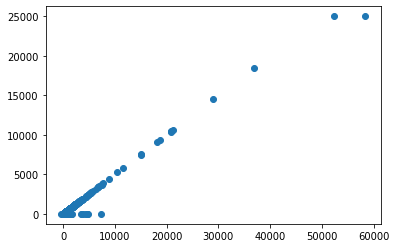

In [6]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(data['invoicepayamount'], data['adminfee'])
plt.show()

## Plot the data distribution of all your numerical columns in histogram and boxplot

array([[<AxesSubplot:title={'center':'invoicepayamount'}>,
        <AxesSubplot:title={'center':'adminfee'}>]], dtype=object)

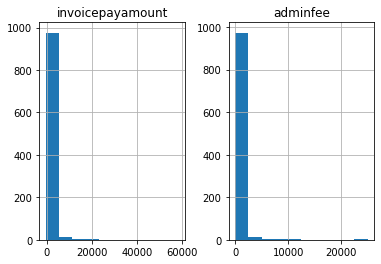

In [90]:
data.hist()

<AxesSubplot:>

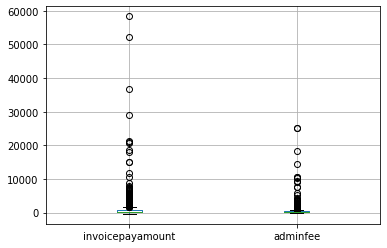

In [91]:
data.boxplot()

## Create a new column in the same dataframe that is raised power of two of an existing column
Example:
![power_of_two](images/ex1.jpeg)


In [92]:
data["Raised_power_value_of_adminfee"] = data["adminfee"] ** 2
data.head()

,invoicepayamount,adminfee,Raised_power_value_of_adminfee
0,50.0,25.0,625.00
1,50.0,25.0,625.00
2,295.0,147.5,21756.25
3,50.0,25.0,625.00
4,300.0,150.0,22500.00


# Citi Bike investigation
![citi-bike](images/citibike.jpeg)
>Citi Bike is the largest bike share program in the US, with 20,000 bikes and over 1,300 stations across Manhattan, Brooklyn, Queens, the Bronx and Jersey City. It was designed for quick trips with convenience in mind, and it’s a fun and affordable way to get around town.

## Choose a citibikes dataset (one or two months, earlier datasets are convenient because they are smaller)

Example for downloading September 2017 Citibike data:
```
! month=201709
! curl https://s3.amazonaws.com/tripdata/$month-citibike-tripdata.csv.zip >> $month-citibike-tripdata.csv.zip
! unzip $month-citibike-tripdata.csv.zip
```

I choose data 1 month in September 2021 (only 1 month, because the size is about 100 mb hehe)
```
month = 201710
! curl https://s3.amazonaws.com/tripdata/$month-citibike-tripdata.csv.zip >> $month-citibike-tripdata.csv.zip
! unzip $month-citibike-tripdata.csv.zip
```

In [10]:
import pandas as pd
citibike = pd.read_csv("201710-citibike-tripdata.csv")
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,457,2017-10-01 00:00:00,2017-10-01 00:07:38,479,9 Ave & W 45 St,40.760193,-73.991255,478,11 Ave & W 41 St,40.760301,-73.998842,30951,Subscriber,1985.0,1
1,6462,2017-10-01 00:00:20,2017-10-01 01:48:03,279,Peck Slip & Front St,40.707873,-74.001670,307,Canal St & Rutgers St,40.714275,-73.989900,14809,Customer,NaN,0
2,761,2017-10-01 00:00:27,2017-10-01 00:13:09,504,1 Ave & E 16 St,40.732219,-73.981656,350,Clinton St & Grand St,40.715595,-73.987030,28713,Subscriber,1992.0,1
3,1193,2017-10-01 00:00:29,2017-10-01 00:20:22,3236,W 42 St & Dyer Ave,40.758985,-73.993800,3233,E 48 St & 5 Ave,40.757246,-73.978059,16008,Customer,1992.0,2
4,2772,2017-10-01 00:00:32,2017-10-01 00:46:44,2006,Central Park S & 6 Ave,40.765909,-73.976342,469,Broadway & W 53 St,40.763441,-73.982681,14556,Customer,NaN,0


## Count the number of missing values of each column

In [11]:
citibike.isnull().sum()

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
birth year                 195593
gender                          0
dtype: int64

In [12]:
# make new columns: "hour", "day of week", "day of month"
citibike["starttime"] = pd.to_datetime(citibike["starttime"])
citibike["date"] = citibike["starttime"].dt.date
citibike["hour of day"] = citibike["starttime"].dt.hour
citibike["day of week"] = citibike["starttime"].dt.day_name()
citibike["day of month"] = citibike["starttime"].dt.day

## Who rides citibikes? Show ridership distribution by gender, user type, and age
Process the data and plot your answers

<AxesSubplot:>

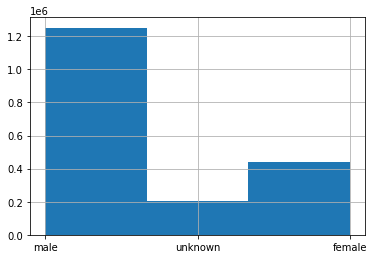

In [70]:
citibike["gender"].astype('category')
citibike["gender"].loc[(citibike["gender"] == 0)] = "unknown"
citibike["gender"].loc[(citibike["gender"] == 1)] = "male"
citibike["gender"].loc[(citibike["gender"] == 2)] = "female"
citibike["gender"].hist(bins=3)

<AxesSubplot:>

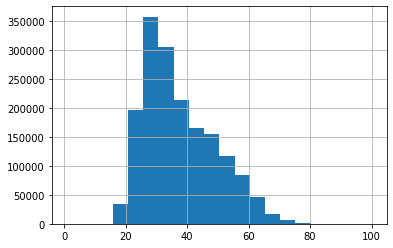

In [64]:
citibike["age"].hist(bins=20, range=(1,100))

<AxesSubplot:>

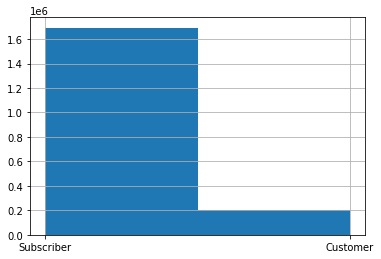

In [51]:
citibike["usertype"].hist(bins=2)

In [55]:
citibike["bikeid"].groupby(citibike['usertype']).count()

usertype
Customer       205000
Subscriber    1692592
Name: bikeid, dtype: int64

## What is the average number of trips per day?

In [24]:
# September 2017 is month of dataset. Because there is no birth day and month, this operation only use birth year
citibike["age"] = 2017 - citibike["birth year"]

In [93]:
print("the average number of trips per day is",
      round(citibike["bikeid"].groupby(citibike["date"]).count().mean(), 2) )

the average number of trips per day is 61212.65


## What is the average trip duration?

In [94]:
def convert(seconds):
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
    
    return "%d:%02d:%02d" % (hour, minutes, seconds)

detik = citibike["tripduration"].mean()
print("the average trip duration is", detik, "seconds or about", convert(detik))

the average trip duration is 1067.8202068727103 seconds or about 0:17:47


## What days of the week are most rides taken on?
Process the data and plot your answer

In [73]:
citibike["bikeid"].groupby(citibike['day of week']).count().sort_values(ascending=False).head(1)

day of week
Tuesday    316022
Name: bikeid, dtype: int64

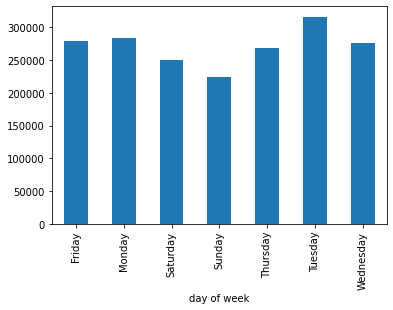

In [30]:
import matplotlib.pyplot as plt

citibike["bikeid"].groupby(citibike['day of week']).count().plot(kind="bar")
plt.show()

the most rides taken is on **Tuesday**

## What hour of the day are most rides taken on?
Process the data and plot your answer

In [39]:
citibike["bikeid"].groupby(citibike['hour of day']).count().sort_values(ascending=False).head(1)

hour of day
17    195403
Name: bikeid, dtype: int64

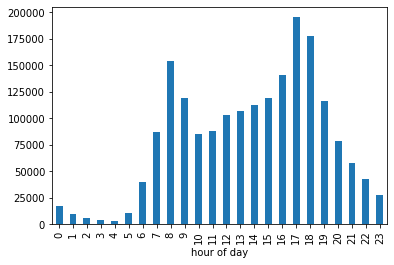

In [29]:
import matplotlib.pyplot as plt

hours_count = citibike["bikeid"].groupby(citibike['hour of day']).count().plot(kind="bar")
plt.show()

the most rides taken is about **17 o'clock** or **5 pm**

## Is there correlation between age and trip duration?

In [25]:
citibike[["age","tripduration"]].corr()

,age,tripduration
age,1.000000,-0.003995
tripduration,-0.003995,1.000000


**There is no correlation**. Althogh it show negative correlation, but the velue is very close to 0 which is -0.004

## What are the top 10 pair of stations that our riders use as a start & stopping point?

In [44]:
print("The top 10 pair of stations that our riders use as a starting point")
citibike["bikeid"].groupby(citibike["start station name"]).count().sort_values(ascending=False).head(10)

The top 10 pair of stations that our riders use as a starting point


start station name
Pershing Square North    17995
Broadway & E 22 St       12641
W 21 St & 6 Ave          12370
E 17 St & Broadway       12311
West St & Chambers St    11738
8 Ave & W 31 St          11606
Broadway & E 14 St       10652
8 Ave & W 33 St          10192
12 Ave & W 40 St          9893
W 20 St & 11 Ave          9882
Name: bikeid, dtype: int64

In [45]:
print("The top 10 pair of stations that our riders use as a stopping point")
citibike["bikeid"].groupby(citibike["end station name"]).count().sort_values(ascending=False).head(10)

The top 10 pair of stations that our riders use as a stopping point


end station name
Pershing Square North    17752
West St & Chambers St    13166
Broadway & E 22 St       12788
E 17 St & Broadway       12557
W 21 St & 6 Ave          12459
8 Ave & W 31 St          12125
Broadway & E 14 St       10602
W 20 St & 11 Ave         10288
12 Ave & W 40 St         10007
8 Ave & W 33 St           9900
Name: bikeid, dtype: int64

In [83]:
starting_point = citibike["bikeid"].groupby(citibike["start station name"]).count().sort_index()
stopping_point = citibike["bikeid"].groupby(citibike["end station name"]).count().sort_index()
start_stopping = starting_point + stopping_point
print("The top 10 pair of stations that our riders use as a start and stopping point")
start_stopping.sort_values(ascending=False).head(10)

The top 10 pair of stations that our riders use as a start and stopping point


Pershing Square North    35747.0
Broadway & E 22 St       25429.0
West St & Chambers St    24904.0
E 17 St & Broadway       24868.0
W 21 St & 6 Ave          24829.0
8 Ave & W 31 St          23731.0
Broadway & E 14 St       21254.0
W 20 St & 11 Ave         20170.0
8 Ave & W 33 St          20092.0
12 Ave & W 40 St         19900.0
Name: bikeid, dtype: float64

## Come up with your own question on the Citibike data usage and formulate a hypothesis

### Example:
### "Women are less likely than men to choose biking for commuting."
>
>Null Hypothesis: 

>The proportion of men biking on weekends is the same or higher than the proportion of women biking on weekends



### My own: kinda similar sih hehe
### "Women are less likely than men in trip duration when they bike for commuting"
>
>**Null Hypothesis**: The average trip duration of men is higher than the average trip duration of women when they bike for commuting



## Work with your dataset and show your findings to help answer your question

In [85]:
citibike["tripduration"].groupby(citibike["gender"]).mean()

gender
female     1126.910630
male        924.441865
unknown    1817.716119
Name: tripduration, dtype: float64

from the above result, we can know that **my null hypothesis is rejected**

this answers that the average trip duration of women is higher than the average trip duration of man when they bike for commuting. this is insight for bicycle rental provider for example, that promotion for women with trip duration approach can be considered.

# Submit Instructions
Rename this notebook to `mod2_<first_name>_<last_name>.ipynb` and push this to your branch in module-2 repository

```
git checkout -b tanyani
git add mod2_tanya_nabila.ipynb
git commit -m 'submit mod2 assignment for Tanya Nabila'
git push
```